In [2]:
# Comments and Title

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./loan.csv')

C:\Users\adi00\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# Check if there are all Null columns
all_na = (round(100*(df.isnull().sum()/len(df.index)), 2) > 90)
print('All Null columns = ', all_na[all_na].index.size)

All Null columns =  56


In [7]:
# Lets remove all 54 columns where all records are null
print('Number of columns before cleaning: ', df.columns.size)
df.dropna(how = 'all', axis = 1, inplace = True)
df.dropna(how='all', inplace=True)
print('Number of columns after cleaning: ', df.columns.size)

Number of columns before cleaning:  111
Number of columns after cleaning:  57


In [9]:
# find columns with 0s
most_empty = round(100*((df.eq(0).sum() + df.isnull().sum())/len(df.index)), 2)
most_empty_columns = most_empty[most_empty > 85].index.tolist()

In [10]:
# list of columns to be dropped
set(df.columns.tolist()) - set(df.drop(columns = most_empty_columns, axis=1).columns.tolist())

{'acc_now_delinq',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'mths_since_last_record',
 'next_pymnt_d',
 'out_prncp',
 'out_prncp_inv',
 'pub_rec',
 'pub_rec_bankruptcies',
 'recoveries',
 'tax_liens',
 'total_rec_late_fee'}

In [11]:
df.drop(columns = most_empty_columns, axis=1, inplace = True)

In [12]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type'],
      dtype='object')

In [173]:
columns_to_drop = ['url', 'desc', 'zip_code', 'initial_list_status', 'total_pymnt_inv', 'total_rec_int']
# url - is the url of the report which has no significance in the analysis
# desc - is text which defines purpose of the loan, we already have a purpose column
# zip_code - is the zip code and has no significance in the analysis
# initial_list_status - all values are 'f'
# total_rec_int - is total received interest. Which shows profit but we are not analyzing profit.
# policy_code - has all values as 1
# application_type - has all values as INDIVIDUAL (which refers to policy_code may be) 

In [ ]:
# total_pymnt_inv - is having 97% +ve correlation with 'total_pymnt'
# total_rec_prncp - is having 97% +ve correlation with 'total_pymnt'. Another thought this may be required to update Current loans

df.total_pymnt_inv.corr(df.total_pymnt)

columns_to_drop = ['total_pymnt_inv', 'total_rec_prncp']

In [172]:
# df.loc[:, ['loan_status']]

# df[df.loan_status == 'Current'][['total_pymnt', 'loan_amnt', 'term', 'issue_d']]

# (df[df.loan_status == 'Current'].funded_amnt - df[df.loan_status == 'Current'].total_rec_prncp)

df.application_type.value_counts()

# df_current = df[df.loan_status == 'Current']
# df_current.loc[:, 'pending_principle'] = (df_current.funded_amnt - df_current.total_rec_prncp)


# ((df_current.pending_principle - df_current.installment) <= 6*df_current.installment).value_counts()
# .loc[:, ['installment', ]]

#df[df.loan_status == 'Current'].loc[:, ['total_rec_prncp', 'funded_amnt']]
# for col in ['emp_title', 'url', 'desc', 'title']:
#     print(col, df[col].str.lower().unique().size)

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [167]:
# df_current[~(df_current.mths_since_last_delinq.isnull())]
# df_current.last_pymnt_date = pd.to_datetime('1-' + df_current.last_pymnt_d)
# df_current.issue_d = pd.to_datetime('1-' + df_current.issue_d)
df_current.loc[:, 'installemnts_paid'] = (df_current.last_pymnt_d - df_current.issue_d)/np.timedelta64(1, 'M')

df_current[['installemnts_paid', 'term', 'pending_principle', 'installment']]

,installemnts_paid,term,pending_principle,installment
4,52.994928,60 months,524.06,67.79
32,52.994928,60 months,1849.11,242.97
39,52.994928,60 months,2181.42,282.44
86,52.994928,60 months,2637.33,349.98
95,52.994928,60 months,3125.79,423.10
...,...,...,...,...
15972,60.025873,60 months,238.82,218.99
15981,61.011520,60 months,10.26,128.58
16361,61.011520,60 months,19.12,414.97
16609,61.011520,60 months,13.28,198.66


In [ ]:
# SCOPE FOR ANALYSIS
# earliest_cr_line has date when the first account was opened .. we can create a derived column with the difference between loan issue and this date 
# we can also create earliest_cr_year to make it more sensible. This will show how much we can trust the data

# Delete - nq has number of months since the person went delinquent. We can create a categorical column such as less than a year or more than a year etc. 
# if we find any correlation. (May not be required)

# df_new = pd.DataFrame({ 'payment_loan': (df.total_pymnt - df.loan_amnt), 'status': df.loan_status })
# df_new[(df_new.status == 'Fully Paid') & (df_new['payment_loan'] < 0)]
# How come there are 1203 rows who have (total_pymnt - loan_amnt < 0) but the loan is Fully Paid. 
# I think these should be either current or Charged Off. Its just 3% of the total records. Delete Rows ?
# But the count of rows with Charged Off are 5627 only so I think we should mark above records as Charged Off ?
# **** Ask a question ****

# we just want to find out who are defaulters or who can defualt, so should we analyze them separatel. 
# i.e. create a df for Fully Paid + Current and another one for Charged Off

# loan_status = 'Current' does not give any information if the loan is Paid or not paid

# in current loans, there are 756 loans where people have not went delinquent and will pay off the loan in next 6 mnth
# shall we mark them as 'Paid'

# there are 363 rows where individual is delinquent since more than 9 months
# we shall either mark these as 'Charged Off' or get rid of these ?
# I know we are adding bias here but these are anyways risky people to whom one should not give loans
# # df_current[~(df_current.mths_since_last_delinq.isnull())]
# df_current.last_pymnt_date = pd.to_datetime('1-' + df_current.last_pymnt_d)
# df_current.issue_d = pd.to_datetime('1-' + df_current.issue_d)
# df_current.loc[:, 'installemnts_paid'] = (df_current.last_pymnt_d - df_current.issue_d)/np.timedelta64(1, 'M')

# df_current[['installemnts_paid', 'term', 'pending_principle', 'installment']]

In [93]:
df.emp_title.str.lower().str.replace(' ', '').value_counts(dropna = False)

NaN                           2459
usarmy                         212
bankofamerica                  139
jpmorganchase                   92
walmart                         92
                              ... 
cole,evans&peterson              1
oregondeptoftransportation       1
mig,inc.                         1
baysideassetmanagement           1
finishlinepds                    1
Name: emp_title, Length: 26995, dtype: int64

In [140]:
# checking the percetage of zeros in each column
round(100*(df.eq(0).sum()/len(df.index)), 2)

NameError: name 'df' is not defined

In [8]:
# As number of columns is 39717, there are no rows with all values null

In [78]:
# find columns where all values are 0
describe = df_loan.describe()
all_zero = describe.loc[:, (describe.loc['min'] == 0) & (describe.loc['max'] == 0)].columns
print(all_zero)

Index(['collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [85]:
# collections_12_mths_ex_med = Number of collections in 12 months excluding medical collections
# acc_now_delinq = The number of accounts on which the borrower is now delinquent
# chargeoff_within_12_mths = Number of charge-offs within 12 months
# delinq_amnt = The past-due amount owed for the accounts on which the borrower is now delinquent.
# tax_liens = Number of tax liens

# Above are the definitions of columns with all 0 (min = 0 and max = 0) values. After looking at it, 
# it seems like none of the current borrowers are defaulters. 
# Lets drop these columns as they are being all 0, not adding any value to the analysis

df_loan.drop(all_zero, axis = 1, inplace = True)

In [87]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,1.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,2.000000


In [93]:
# Lets find missing values
df_loan.iloc[:, : 10].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000


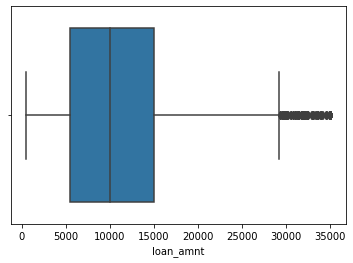

In [98]:
sns.boxplot(df_loan.loan_amnt)

In [104]:
df_loan_less29000 = df_loan[df_loan.loan_amnt < 29000]
df_loan_more29000 = df_loan[df_loan.loan_amnt >= 29000]

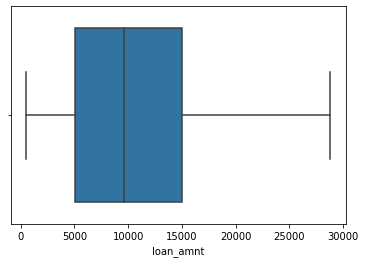

In [103]:
sns.boxplot(df_loan_less29000.loan_amnt)

In [108]:
df_loan_more29000.iloc[:, 0:10]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
31,1069539,1304608,31825,31825,31825.00000,36 months,7.90%,995.82,A,A4
80,1068994,1303432,35000,22075,22050.00000,60 months,17.27%,551.84,D,D3
128,1068159,1302729,35000,35000,35000.00000,36 months,8.90%,1111.37,A,A5
185,1067084,1301459,35000,35000,35000.00000,36 months,10.65%,1140.07,B,B2
209,1066706,1300906,29500,29500,28513.45925,60 months,20.30%,786.51,E,E5
...,...,...,...,...,...,...,...,...,...,...
19800,669297,855767,32000,32000,31684.89912,60 months,20.85%,863.01,G,G3
19811,666337,851924,32000,32000,31569.14450,60 months,19.74%,843.19,F,F5
19825,668841,855204,30000,30000,29094.62328,60 months,16.40%,735.94,E,E1
19838,668594,854847,30000,30000,30000.00000,60 months,17.88%,759.85,E,E5


In [123]:
df_loan.iloc[:, 20:30]

,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record
0,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN
1,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN
2,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN
3,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN
4,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN
...,...,...,...,...,...,...,...,...,...,...
39712,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0
39713,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0
39714,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0
39715,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0


In [114]:
df_loan.pymnt_plan.value_counts()
#pymnt_plan have all 'n' it can be deleted

n    39717
Name: pymnt_plan, dtype: int64

In [131]:
pd.options.display.max_colwidth = 1000
df_loan.dti

0        27.65
1         1.00
2         8.72
3        20.00
4        17.94
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 39717, dtype: float64

In [133]:
df_loan.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64